In [1]:
#import library
import pandas as pd
from sklearn.cluster import KMeans
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.stattools as ts
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.statespace.sarimax as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

In [3]:
#import data
df_product = pd.read_csv("Case Study - Product.csv",sep=';', skipinitialspace=True)
df_customer = pd.read_csv("Case Study - Customer.csv",sep=';', skipinitialspace=True)
df_tranksaksi = pd.read_csv("Case Study - Transaction.csv",sep=';', skipinitialspace=True)
df_store  = pd.read_csv("Case Study - Store.csv",sep=';', skipinitialspace=True)


In [5]:
#melakukan pengecekan untuk missing value
mc = df_customer.isna().sum().sum()
mp = df_product.isna().sum().sum()
mt = df_tranksaksi.isna().sum().sum()
ms = df_store.isna().sum().sum()

In [6]:
# melakukan pengecekan data duplikat
d1 = df_customer.duplicated()
d2 = df_product.duplicated()
d3 = df_store.duplicated()
d4 = df_tranksaksi.duplicated()


In [14]:
print("TOTAL NILAI MISSING VALUE DISETIAP FILE "
      "\ndata customer = ",mc ,
      "\n data produk = ",mp ,
      "\n data transaksi = ",mt ,
      "\n data toko = ",ms)
print("\n")
print("TOTAL NILAI MISSING VALUE DISETIAP FILE"
      "\n data customer = ",d1,
      "\n data produk = ",d2 ,
      "\n data transaksi = ",d3,
      "\n data toko = ",d4)

TOTAL NILAI MISSING VALUE DISETIAP FILE 
data customer =  0 
 data produk =  0 
 data transaksi =  0 
 data toko =  0


TOTAL NILAI MISSING VALUE DISETIAP FILE
 data customer =  0      False
1      False
2      False
3      False
4      False
       ...  
442    False
443    False
444    False
445    False
446    False
Length: 447, dtype: bool 
 data produk =  0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool 
 data transaksi =  0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool 
 data toko =  0       False
1       False
2       False
3       False
4       False
        ...  
5015    False
5016    False
5017    False
5018    False
5019    False
Length: 5020, dtype: bool


In [15]:
#melakukan penghapusan missing value
df_customer = df_customer.dropna()
mc = df_customer.isna().sum().sum()

In [16]:
#mengubah data
df_customer['Income'] = df_customer['Income'].str.replace(',', '.').astype('float')
df_store['Latitude'] = df_store['Latitude'].str.replace(',', '.').astype('float')
df_store['Longitude'] = df_store['Longitude'].str.replace(',', '.').astype('float')
df_tranksaksi['Date'] = pd.to_datetime(df_tranksaksi['Date'], format="%d/%m/%Y")


In [17]:
#menggabungkan data
df_merge = pd.merge(df_store,df_tranksaksi, on="StoreID")
df_merge = pd.merge(df_merge,df_customer, on="CustomerID")
df_merge = pd.merge(df_merge,df_product.drop(columns='Price'), on="ProductID")

In [61]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   StoreID         4976 non-null   int64         
 1   StoreName       4976 non-null   object        
 2   GroupStore      4976 non-null   object        
 3   Type            4976 non-null   object        
 4   Latitude        4976 non-null   float64       
 5   Longitude       4976 non-null   float64       
 6   TransactionID   4976 non-null   object        
 7   CustomerID      4976 non-null   int64         
 8   Date            4976 non-null   datetime64[ns]
 9   ProductID       4976 non-null   object        
 10  Price           4976 non-null   int64         
 11  Qty             4976 non-null   int64         
 12  TotalAmount     4976 non-null   int64         
 13  Age             4976 non-null   int64         
 14  Gender          4976 non-null   int64         
 15  Mari

In [62]:
df_merge.describe()

,StoreID,Latitude,Longitude,CustomerID,Price,Qty,TotalAmount,Age,Gender,Income
count,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000,4976.000000
mean,7.492162,-2.944228,109.602110,220.597267,9690.293408,3.642484,32268.629421,40.079582,0.448151,8.649224
std,4.027835,4.321477,8.368621,128.735807,4601.844969,1.855968,19661.512914,12.862586,0.497354,6.536447
min,1.000000,-7.797068,95.323753,1.000000,3200.000000,1.000000,7500.000000,0.000000,0.000000,0.000000
25%,4.000000,-6.914864,104.756554,108.750000,4200.000000,2.000000,16000.000000,30.000000,0.000000,4.250000
50%,7.000000,-5.135399,110.370529,220.000000,9400.000000,3.000000,28200.000000,39.000000,0.000000,7.720000
75%,11.000000,0.533505,114.590111,330.000000,15000.000000,5.000000,47000.000000,51.000000,1.000000,10.840000
max,14.000000,5.548290,128.190643,447.000000,18000.000000,10.000000,88000.000000,72.000000,1.000000,71.300000


In [63]:
df_merge.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,Age,Gender,Marital Status,Income,Product Name
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666,TR16356,165,2022-01-01,P9,10000,7,70000,44,1,Married,14.58,Yoghurt
1,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790,TR6066,165,2022-04-24,P9,10000,1,10000,44,1,Married,14.58,Yoghurt
2,12,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554,TR46326,165,2022-02-22,P9,10000,7,70000,44,1,Married,14.58,Yoghurt
3,4,Gita Ginara,Gita,General Trade,-6.966667,110.416664,TR28184,117,2022-06-19,P9,10000,4,40000,45,1,Married,12.55,Yoghurt
4,9,Lingga,Lingga,Modern Trade,-3.654703,128.190643,TR37007,304,2022-05-16,P9,10000,4,40000,34,0,Single,8.55,Yoghurt


In [18]:
# data Time Series
data_time = df_merge.groupby('Date')['Qty'].sum().reset_index()
data = data_time.set_index('Date')
# resample
data1 = data.resample('D').sum()

In [19]:
# Membagi data Train  80% dan data test 20%
train_size = int(len(data1) * 0.8)
train_data, test_data = data1[:train_size], data1[train_size:]
print(train_data.shape, test_data.shape)

(292, 1) (73, 1)


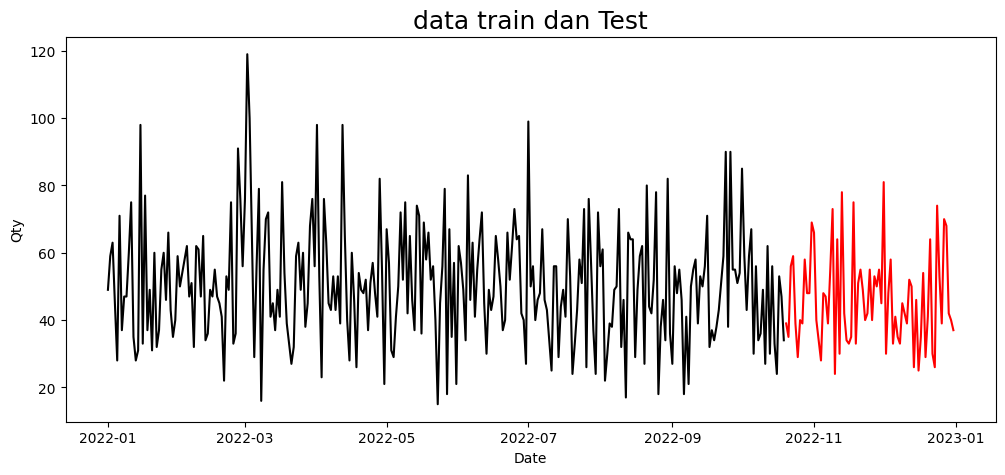

In [24]:
#mevisualisasikan data test dan data train
plt.figure(figsize=(12,5))
sns.lineplot(data=train_data, x=train_data.index, y=train_data['Qty'], color= 'black')
sns.lineplot(data=test_data, x=test_data.index, y=test_data['Qty'], color= 'red')
plt.title('data train dan Test', fontsize=18)
plt.show()

In [47]:
#metode time series ARIMA (Autoregressive Integrated Moving Average)

#memisalkan
p = 0  # Order of Autoregression
d = 0  # Degree of Differencing
q = 0  # Order of Moving Average

#mencoba beberapa kombinasi order dan seasonal order, dan menemukan beberapa paramater yang sesuai dengan prediksi

#membuat model ARIMA dengan parameter
model = sm.SARIMAX(train_data, order=(p, d, q),seasonal_order=(1,1,0,7))


In [48]:
# Latih model
model_fit = model.fit()

In [49]:
 #Menentukan indeks awal dan akhir data yang akan diprediksi
 start_idx = len(train_data)
end_idx = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_idx, end=end_idx, dynamic=False)
print(predictions)

2022-10-20    30.000000
2022-10-21    56.000000
2022-10-22    33.442326
2022-10-23    29.307908
2022-10-24    51.230697
                ...    
2022-12-27    40.868252
2022-12-28    42.584447
2022-12-29    30.000000
2022-12-30    56.000000
2022-12-31    33.306714
Freq: D, Name: predicted_mean, Length: 73, dtype: float64


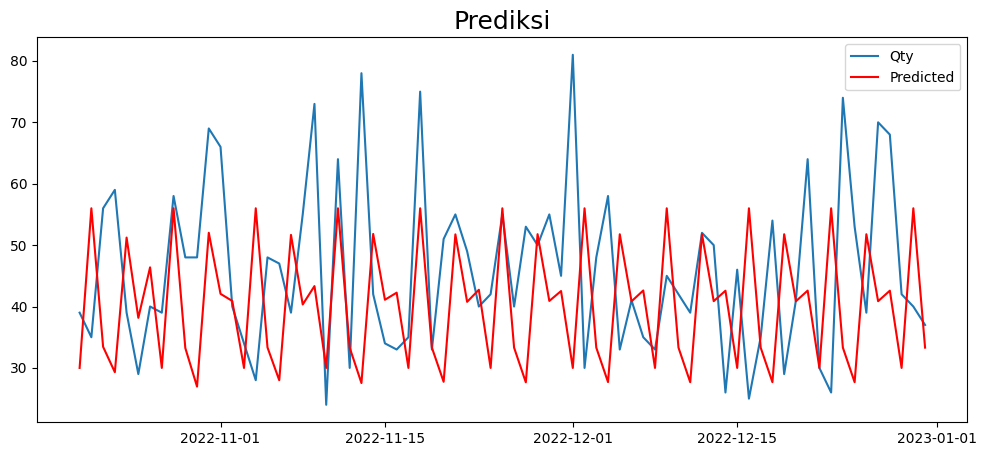

In [50]:
#memvisualisasikan plot prediksi
plt.figure(figsize=(12,5))
plt.plot(test_data, label='Qty')
plt.plot(predictions, color='red', label='Predicted')
plt.title('Prediksi', fontsize=18)
plt.legend()


In [60]:
# Evaluasi performa
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 343.0175318291296


In [66]:
#melakukan pemodelan dengan clustering
# Menggabungkan data berdasarkan CustomerID
df_pre = df_merge.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()

df_pre2 = df_pre.drop(columns="CustomerID")
df_pre2

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600
...,...,...,...
439,13,37,269400
440,18,62,577700
441,18,68,587200
442,11,42,423300


In [71]:
#Standarisasi dataset
X = df_pre2.values
X_std = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(data=X_std,columns=df_pre2.columns)
df_std.isna().sum()


TransactionID    0
Qty              0
TotalAmount      0
dtype: int64

In [72]:
df_std

,TransactionID,Qty,TotalAmount
0,1.788282,1.508934,2.102424
1,0.553450,1.272891,0.246343
2,1.170866,1.194211,0.679428
3,-0.372675,0.407403,-0.475199
4,-1.298799,-1.087531,-0.747585
...,...,...,...
439,0.553450,-0.300723,-0.741157
440,2.096990,1.666295,1.736029
441,2.096990,2.138380,1.812361
442,-0.063967,0.092680,0.495427


In [53]:
#Normalisasi dataset dengan minmaxscaler
X_norm = MinMaxScaler().fit_transform(X)
print(X_norm)
# Normalisasi dataset dengan preprocessing sklearn
X_norm2 = preprocessing.normalize(df_pre2)
print(X_norm2)


[[0.77777778 0.72463768 0.70394911]
 [0.55555556 0.68115942 0.39782666]
 [0.66666667 0.66666667 0.46925523]
 ...
 [0.83333333 0.84057971 0.6561092 ]
 [0.44444444 0.46376812 0.43890803]
 [0.55555556 0.46376812 0.46011132]]
[[2.72741856e-05 9.62618317e-05 9.99999995e-01]
 [3.31379043e-05 1.45296965e-04 9.99999989e-01]
 [3.36172117e-05 1.25504257e-04 9.99999992e-01]
 ...
 [3.06539507e-05 1.15803814e-04 9.99999993e-01]
 [2.59862980e-05 9.92204105e-05 9.99999995e-01]
 [2.95925334e-05 9.56066465e-05 9.99999995e-01]]


In [54]:
#menentuka k cluster terbaik
wcss=[]
for n in range(1 , 11):
  model1 = KMeans(n_clusters=n, init='k-means++', n_init = 10, max_iter=100, tol =0.0001, random_state = 100)
  model1.fit(X_std)
  wcss.append(model1.inertia_)
print(wcss)

[1332.0000000000005, 543.4711248616254, 316.54668247055474, 237.60472575971139, 191.11956602309158, 169.32473141353285, 154.03936160517267, 142.48512585227888, 130.90829014139524, 121.69651564034504]


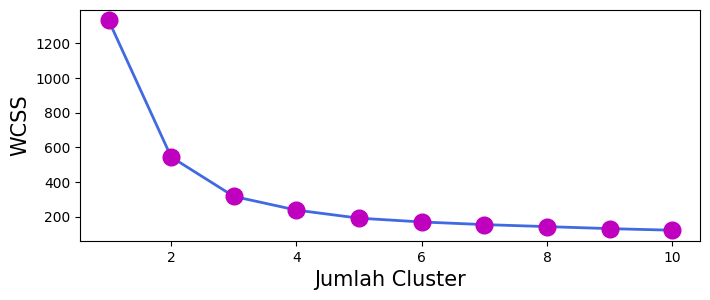

In [73]:
#gambar sebagai patokan untuk cluster kmeans terbaik
plt.figure(figsize=(8,3))
plt.plot(list(range(1, 11)), wcss, color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='m', markeredgecolor='m')
plt.xlabel('Jumlah Cluster', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.show()

In [56]:
#KMeans terbaik = 4
kmeans_4 =KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, tol=0.0001, random_state=100)
kmeans_4.fit(X_std)

KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=100)

In [57]:
# Masukan cluster ke dataset
df_pre2['cluster'] = kmeans_4.labels_
df_pre2.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,0
1,13,57,392300,2
2,15,56,446200,2
3,10,46,302500,3
4,7,27,268600,1


In [58]:
#memahami cluster
df_pre2['CustomerID'] = df_pre['CustomerID']
df_clust_mean = df_pre2.groupby('cluster').agg({'CustomerID':'count','TransactionID':'mean','Qty':'mean','TotalAmount':'mean'})
df_clust_mean.sort_values('CustomerID', ascending= True)


,CustomerID,TransactionID,Qty,TotalAmount
cluster,,,,
0,58,16.362069,61.689655,574650.000000
1,93,7.021505,24.505376,208283.870968
2,113,13.247788,49.070796,435833.628319
3,180,10.427778,37.350000,325663.333333


In [59]:
#evaluasi perfoma clustering dengan silhouette coefficient
silhouette_coefficients = silhouette_score(X_std, kmeans_4.labels_)
print("inilah hasil evaluasi dari clustering =",silhouette_coefficients)


inilah hasil evaluasi dari clustering = 0.3781275736270201
